In [1]:
# Analyze hmc samples produced by SLURM job.
# Author Peter Oct 28 2021
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

parameter_names = ['cpa', 'pwr1par', 'pwr2par', 'pwr1perr', 'pwr2perr']
MIN_VALS = np.array([50., 0.2, 0.2, 0.2, 0.2]) #MIN_VALS = np.array([20., 4.5, 50., 0.2, 0.2, 0.2, 0.2])
MAX_VALS = np.array([250., 2., 2.3, 2., 2.3]) #MAX_VALS = np.array([75., 8.5, 250., 2., 2.3, 2., 2.3])

def remove_outliers(samples):
    outlier = np.bitwise_or(samples < MIN_VALS, samples > MAX_VALS)
    outlier = np.any(outlier, axis=1)
    print(f'Removing {outlier.sum()} outliers.')
    return samples[~outlier, :]

Removing 100460 outliers.
Found (533896, 5) samples.


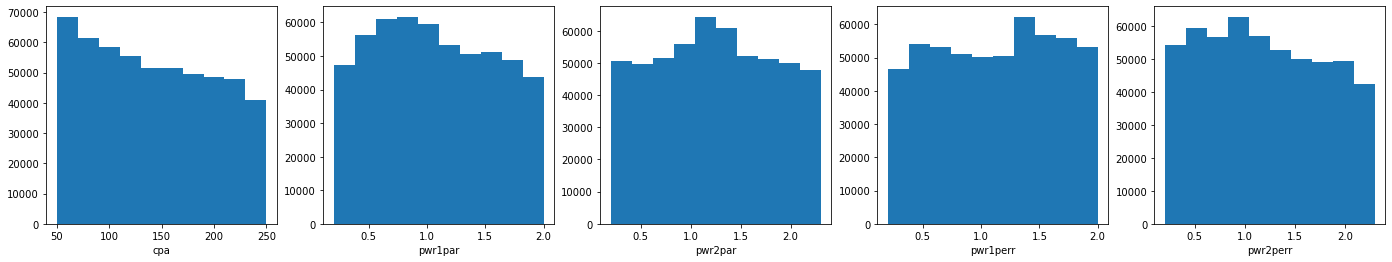

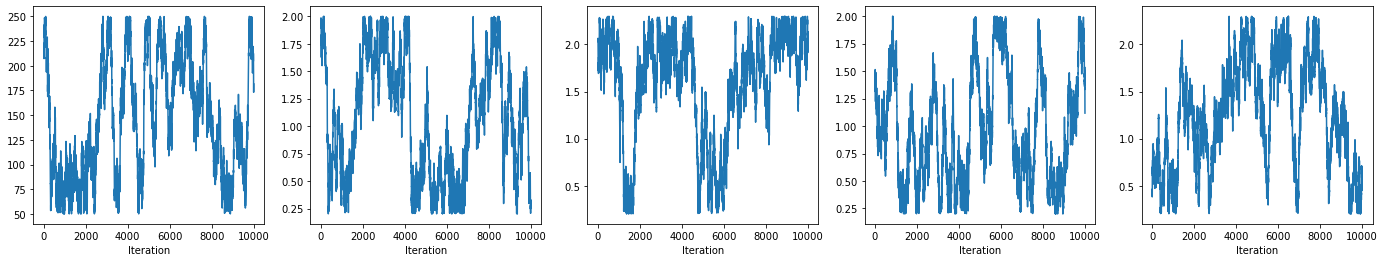

In [2]:
#results_dir = '../../results/job_28990889/'
#results_dir = '../../results/job_28993763/'
results_dir = '../../results/job_28994835/'
sample_files = glob(results_dir + '/samples*.csv')
samples = np.concatenate([np.loadtxt(f, delimiter=',') for f in sample_files], axis=0)
samples = remove_outliers(samples)
print(f'Found {samples.shape} samples.')

# Save samples.
#np.savetxt(fname=f'{results_dir}/samples_{unique_id}.csv', X=samples, delimiter=',')

# Plot marginals.
plt.figure(1, figsize=(24, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.hist(samples[:, i])
    plt.xlabel(parameter_names[i])
    #plt.xlim((MIN_VALS[i], MAX_VALS[i]))
#plt.savefig(fname=f'{results_dir}/marginals_{unique_id}.pdf', bbox_inches='tight')

# Plot trajectories
N = 10000 # For visualizing.
plt.figure(2, figsize=(24, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.plot(samples[:N, i])
    plt.xlabel('Iteration')
#plt.savefig(fname=f'{results_dir}/trajectory_{unique_id}.pdf', bbox_inches='tight')